## Data Visualization and Pre-processing

In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

### 2. Load the dataset.

In [2]:
# Read Dataset
data = pd.read_csv('Churn_Modelling.csv')
data = data.iloc[:,3:]
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3. Visualization process

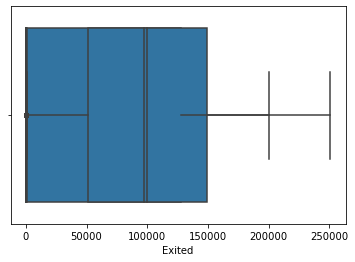

In [3]:
# 1. Univariate Analysis
for col in data.columns:
  if data.dtypes[col]=='int64' or data.dtypes[col]=='float64':
    sns.boxplot(x=data[col]).set(xlabel=col)

C:\Users\Gowrisankar S\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


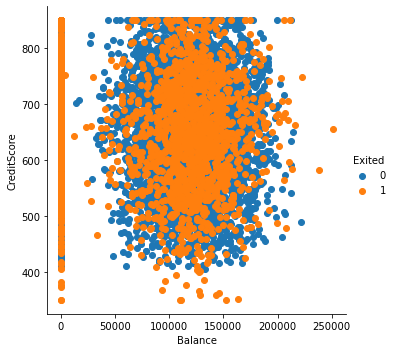

In [4]:
# 2. Bi-Variate Analysis
sns.FacetGrid(data,hue='Exited',size=5).map(plt.scatter,"Balance","CreditScore").add_legend()

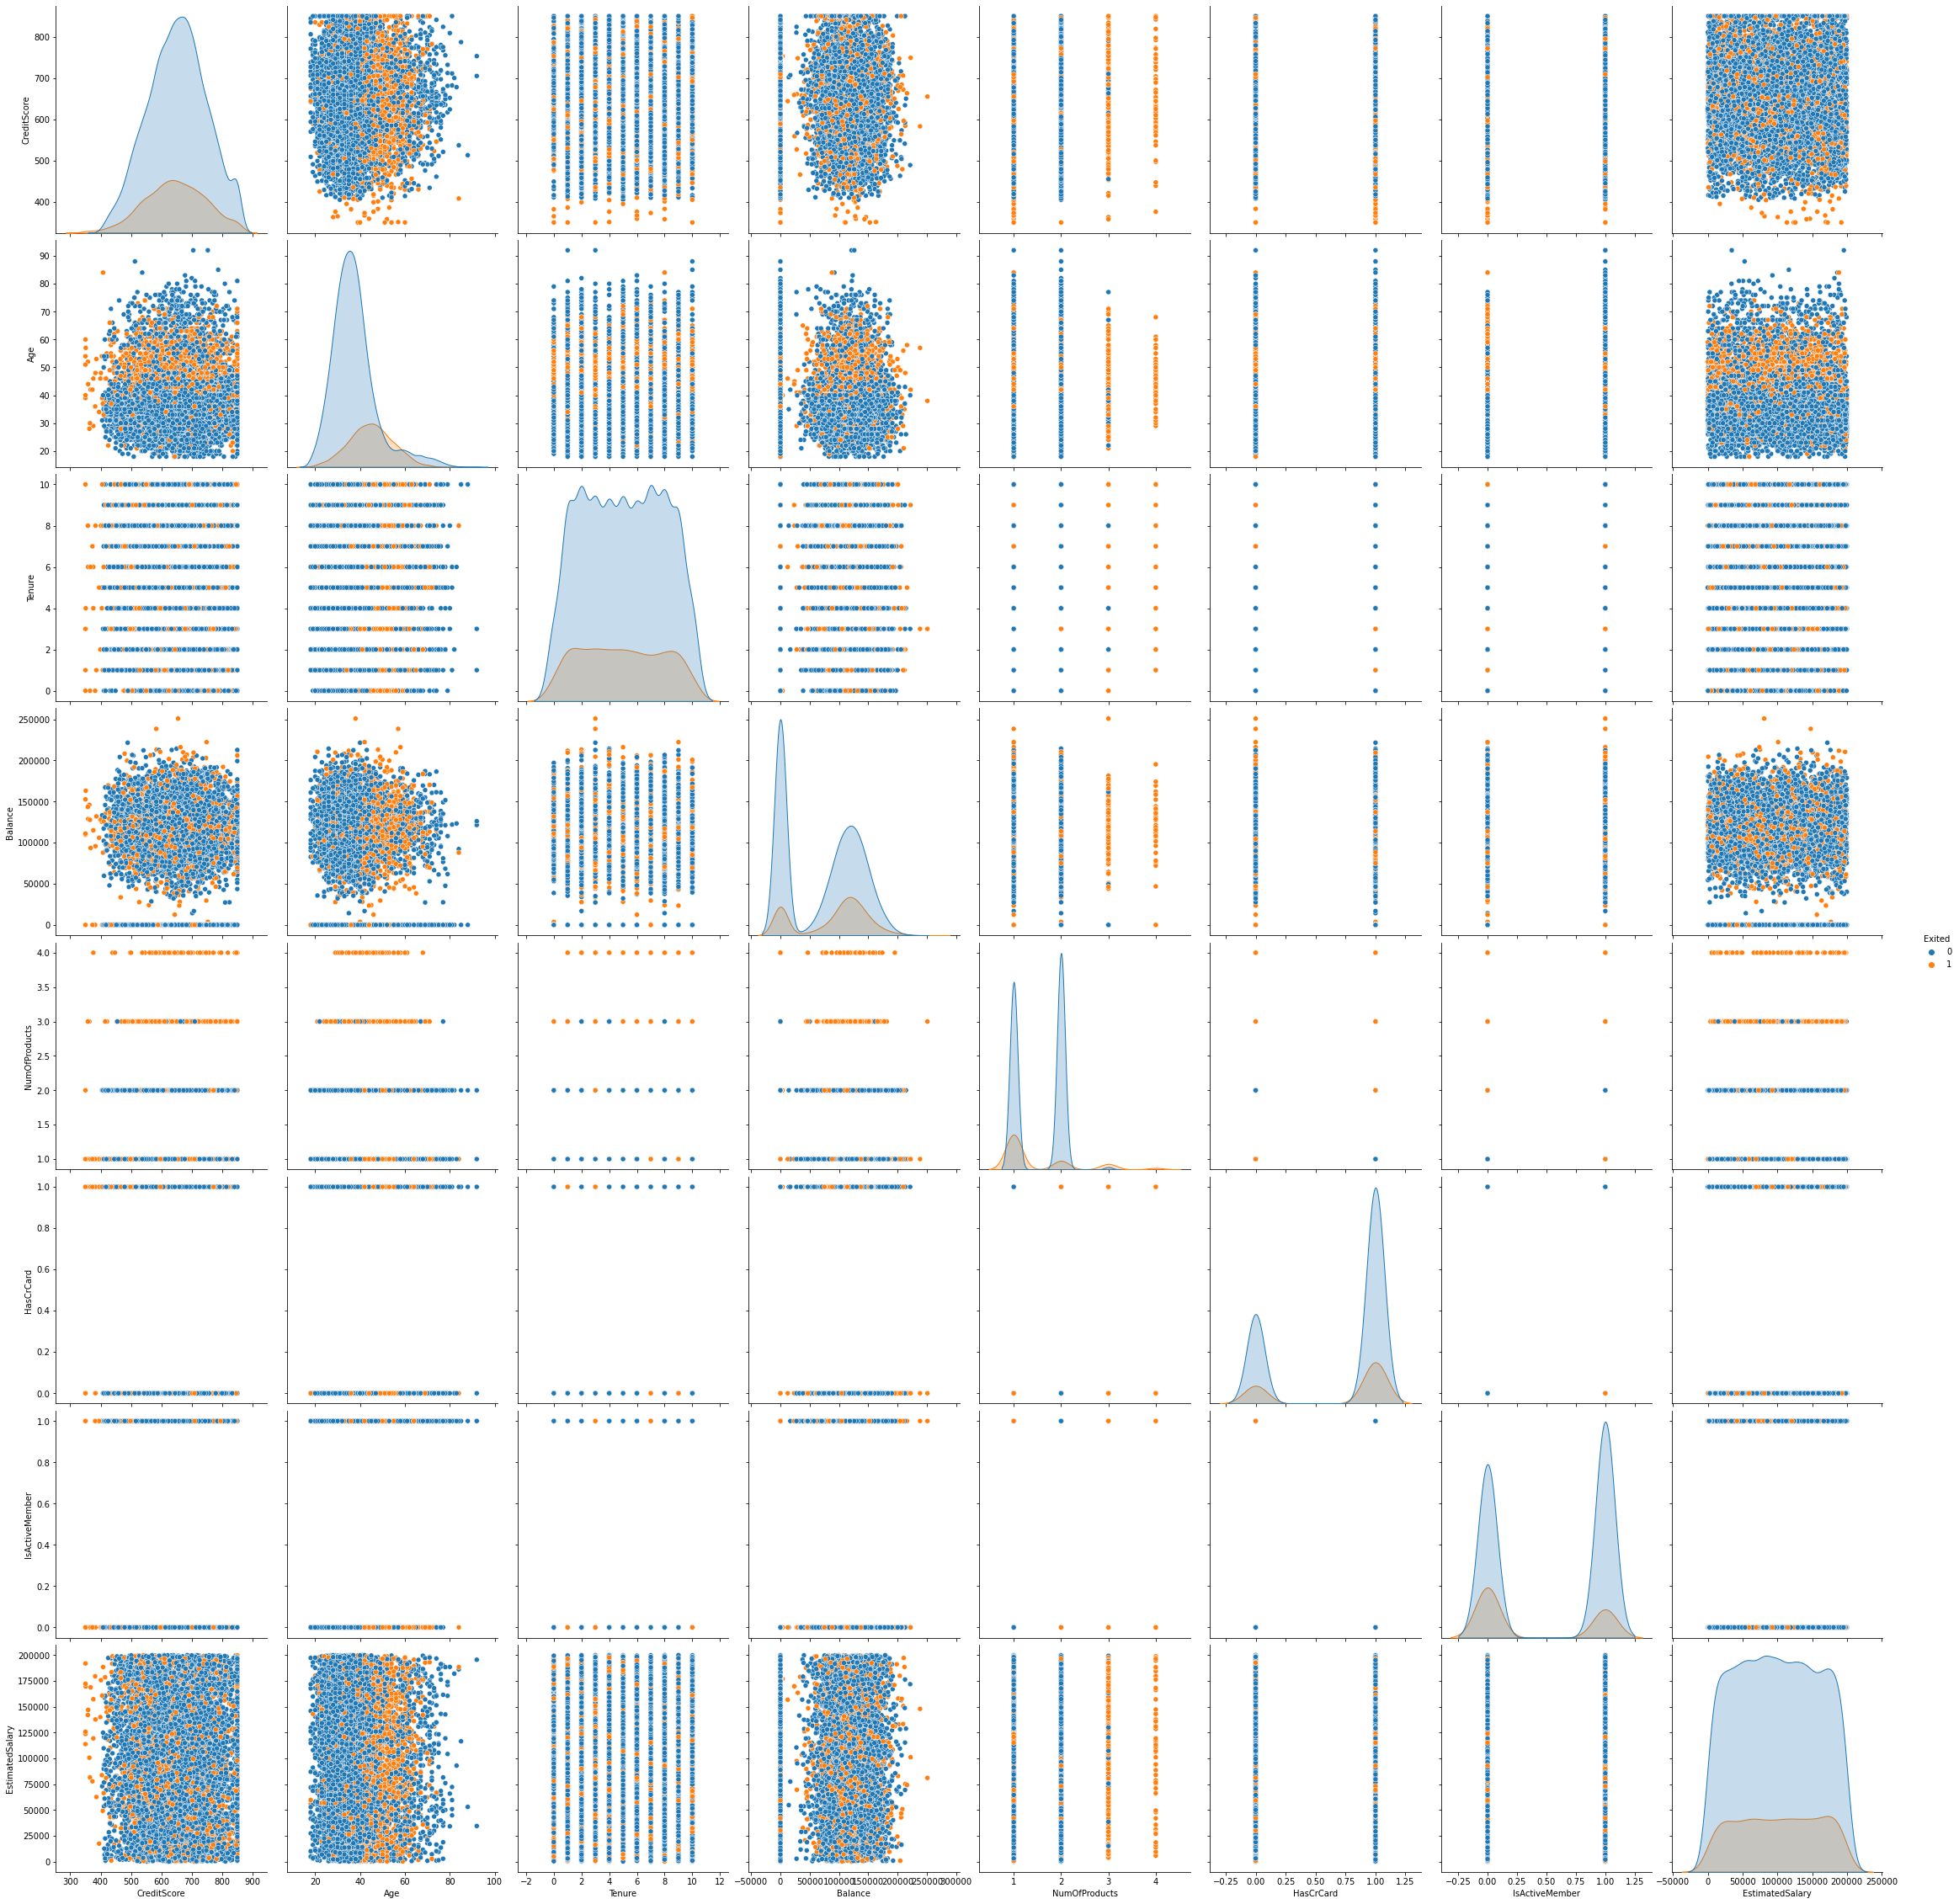

In [5]:
# 3. Multi-Variate Analysis
sns.pairplot(data,hue='Exited',height=4)

## 4. Descriptive Statistics

In [6]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle the missing values

In [7]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 6. Find and Replace the outliers

In [8]:
credit = data.loc[data['CreditScore']<400, 'CreditScore'].median()
prod = data.loc[data['NumOfProducts']>=3.5, 'NumOfProducts'].median()
data.loc[data.CreditScore<400, 'CreditScore']=np.nan
data.fillna(credit,inplace=True)
data.loc[data.NumOfProducts>3, 'NumOfProducts']=np.nan
data.fillna(prod,inplace=True)

## 7. Perform encoding for Categorical Columns

In [9]:
label = LabelEncoder()
data['Geography'] = label.fit_transform(data['Geography'])
data['Gender'] = label.fit_transform(data['Gender'])

## 8. Dependent and Independent variables

In [10]:
dep = data.iloc[:,-1:]
indep = data.iloc[:,:-1]

## 9. Scale the independent variables

In [11]:
indep_var = MinMaxScaler()
show_indep = indep_var.fit_transform(indep)

## 10. Splitting Train and Test Data

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(show_indep, dep, test_size=0.3)
print(xtrain,xtest,ytrain,ytest)

[[0.80824742 0.         1.         ... 1.         0.         0.71915848]
 [0.63917526 1.         0.         ... 0.         1.         0.04129634]
 [0.70721649 0.5        1.         ... 1.         1.         0.13451665]
 ...
 [0.69690722 0.5        0.         ... 1.         0.         0.31855997]
 [0.80618557 0.         1.         ... 1.         0.         0.57139482]
 [0.63917526 0.         0.         ... 1.         0.         0.09096579]] [[0.73608247 0.         0.         ... 0.         1.         0.83994591]
 [0.22474227 1.         1.         ... 0.         0.         0.285846  ]
 [0.46804124 0.         1.         ... 1.         1.         0.09817973]
 ...
 [0.82680412 0.5        1.         ... 0.         1.         0.73851653]
 [1.         0.         1.         ... 1.         0.         0.15640089]
 [0.63092784 0.5        0.         ... 1.         0.         0.76598685]]       Exited
8080       0
8823       0
2864       0
7696       1
6480       0
...      ...
9058       0
8524    